In [ ]:
# 환경 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts -nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Command line option 'n' [from -nanum] is not understood in combination with the other options.


In [ ]:
# 사용 패키지 불러오기
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 구글 코랩에 파일 불러오기
from google.colab import files
files.upload()

Saving KakaoTalkS.txt to KakaoTalkS.txt


{'KakaoTalkS.txt': b"\xec\x84\xb1\xec\x88\x98 \xeb\x8b\x98\xea\xb3\xbc \xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xeb\x8c\x80\xed\x99\x94\r\n\xec\xa0\x80\xec\x9e\xa5\xed\x95\x9c \xeb\x82\xa0\xec\xa7\x9c : 2021-01-27 00:00:58\r\n\r\n--------------- 2020\xeb\x85\x84 5\xec\x9b\x94 19\xec\x9d\xbc \xed\x99\x94\xec\x9a\x94\xec\x9d\xbc ---------------\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\xa0\x84\xec\x97\x90 MBTI\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x8b\xac\xeb\xa6\xac\xed\x96\x88\xeb\x8d\x98\xea\xb1\xb0\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x96\xb4\xeb\x94\x94\xec\x95\xbc?\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xeb\xa7\x81\xed\x81\xac \xec\xa4\xac\xeb\x8a\x94\xeb\x8e\x85\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xe3\x84\xb1\xe3\x84\xb7\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] http

In [ ]:
data = open('KakaoTalkS.txt', 'r')

In [ ]:
# readlines() : 텍스트를 통째로 가녀오는 것으로 새로운 변수에 선언
df = data.readlines()

list = []   # 반목문을 돌리기 위해 빈 list 만들기

for i in df :
  i = i.rstrip('\n')
  i = i.strip()
  list.append(i)  # append를 이용해 빈 list에 쌓기

In [ ]:
# 위 리스트를 갖고 데이터 프레임 제작
list_drop = list[4:]

In [ ]:
col_names = ['words']

In [ ]:
df = pd.DataFrame(list_drop, columns=col_names)
df.head()

,words
0,[성수] [오전 10:50] 전에 MBTI
1,[성수] [오전 10:50] 심리했던거
2,[성수] [오전 10:50] 어디야?
3,[ㅅㅎ🌻] [오전 10:51] 링크 줬는뎅
4,[ㅅㅎ🌻] [오전 10:51] ㄱㄷ


In [ ]:
df['kakao'] = df['words'].apply(lambda x : re.sub('[^가-힣]', '', x))

In [ ]:
df.head()

,words,kakao
0,[성수] [오전 10:50] 전에 MBTI,성수오전전에
1,[성수] [오전 10:50] 심리했던거,성수오전심리했던거
2,[성수] [오전 10:50] 어디야?,성수오전어디야
3,[ㅅㅎ🌻] [오전 10:51] 링크 줬는뎅,오전링크줬는뎅
4,[ㅅㅎ🌻] [오전 10:51] ㄱㄷ,오전


In [ ]:
pip install soynlp

In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency = 100,
     min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
      )
word_extractor.train(df['kakao'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.263 Gb
all cohesion probabilities was computed. # words = 4
all branching entropies was computed # words = 4
all accessor variety was computed # words = 4


In [ ]:
from soynlp.tokenizer import LTokenizer

from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word : score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores = cohesion_score)

In [ ]:
df['tokenizer'] = df['kakao'].apply(lambda x : tokenizer.tokenize(x, remove_r= True))

In [ ]:
words = []
for i in df['tokenizer'].values : 
  for k in i : 
    words.append(k)

In [ ]:
words

['성수오',
 '성수오',
 '성수오',
 '오전링크줬는뎅',
 '오전',
 '오전',
 '오전이거',
 '년월일수요일',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '성수오',
 '오후',
 '오후',
 '오후',
 '오후',
 '성수오',
 '오후',
 '임혹시모르니까나중에결제할때온라인비번변경가능하니까엄마여유로울때엄마랑시간맞춰서변경해',
 '예전에엄마가그거나한테온라인결제많이시켰어서내가해둔거수고수고링',
 '성수오',
 '성수오',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '년월일화요일',
 '성수오',
 '오전',
 '오전시간',
 '오전일단오늘은',
 '오전잘게',
 '년월일월요일',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '오후',
 '성수오',
 '성수오',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '오후',
 '성수오',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '성수오',
 '성수오',
 '성수오',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '오후',
 '오후',
 '오후',
 '오후',
 '성수오',
 '성수오',
 '오후',
 '오후',
 '오후',
 '성수오',
 '성수오',
 '성수오',
 '오후',
 '성수오',
 '성수오',
 '오후',
 '성수오',
 '성수오',
 '오후',
 '성수오',
 '오후',
 '오후',
 '년월일일요일',
 '오후',
 '오후',
 '오후',
 '오후',
 '성수오',
 '성수오',
 '성수오',
 '성수오',
 '오후',
 '오후',
 '성수오',
 '성수오',
 '오후',
 '성수오

In [129]:
from collections import Counter

In [130]:
count = Counter(words)
words_dict = dict(count)

In [131]:
words_dict

{'꿔': 1,
 '년월일금요일': 8,
 '년월일목요일': 4,
 '년월일수요일': 11,
 '년월일월요일': 12,
 '년월일일요일': 9,
 '년월일토요일': 8,
 '년월일화요일': 13,
 '마감일월': 1,
 '마감일화': 1,
 '매물번호': 10,
 '사람인에서보기': 2,
 '성수오': 836,
 '아무리마음이아파도계속해서믿는다면바라는꿈이이뤄질거야': 1,
 '예전에엄마가그거나한테온라인결제많이시켰어서내가해둔거수고수고링': 1,
 '오전': 20,
 '오전감사굿밤': 1,
 '오전감사요': 1,
 '오전갑자기과거여행보내기냐': 1,
 '오전구냥오늘편의점가서한번해줘용': 1,
 '오전구디에서연락옴': 1,
 '오전그거편으점으로해서택배보내줄수있오': 1,
 '오전그건자리없다더라': 1,
 '오전그냥말한거': 1,
 '오전그럼구디안여': 1,
 '오전근데': 1,
 '오전기억안나는뎅': 1,
 '오전나단과로일단듣고': 1,
 '오전나와서': 1,
 '오전나택배로보낸짐중에': 1,
 '오전넷마블주넷마블신입및경력채용공고': 1,
 '오전누르먄라': 1,
 '오전다른수업으로연락옴': 1,
 '오전달라': 1,
 '오전링크줬는뎅': 1,
 '오전맞아': 1,
 '오전맞아근데구디연락와서구냥말했옹': 1,
 '오전방금': 1,
 '오전빅데이터만빠진거래': 1,
 '오전빅데이터말구따른쉅자리났는데': 1,
 '오전빠잉빠잉': 1,
 '오전사진': 6,
 '오전송장번호나중에한번보내죠': 1,
 '오전수업이': 1,
 '오전시간': 1,
 '오전쏘링': 1,
 '오전아': 1,
 '오전아님요고': 1,
 '오전아디다스아디브레이크팬츠블랙화이트원우신사스토어': 1,
 '오전아빠한테는말하지마셈': 1,
 '오전아하': 1,
 '오전알려준거': 1,
 '오전알아보셈': 1,
 '오전어째': 1,
 '오전에코버킷숄더백': 1,
 '오전연락온거라': 1,
 '오전연락처엄마님': 1,
 '오전영상소리임요': 1,
 '오전오늘쉅': 1,
 '오전오빠': 3,
 '오전오빠오빠학원알프로

In [ ]:
# 한글 폰트 설치해 경로설정해주기 
!apt -qq -y install fonts-nanum > /dev/null # 폰트 나눔을 구글코랩에 설치하고 경로를 파악함
import matplotlib.font_manager as fm 
fontpath='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath,size=9)

## 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

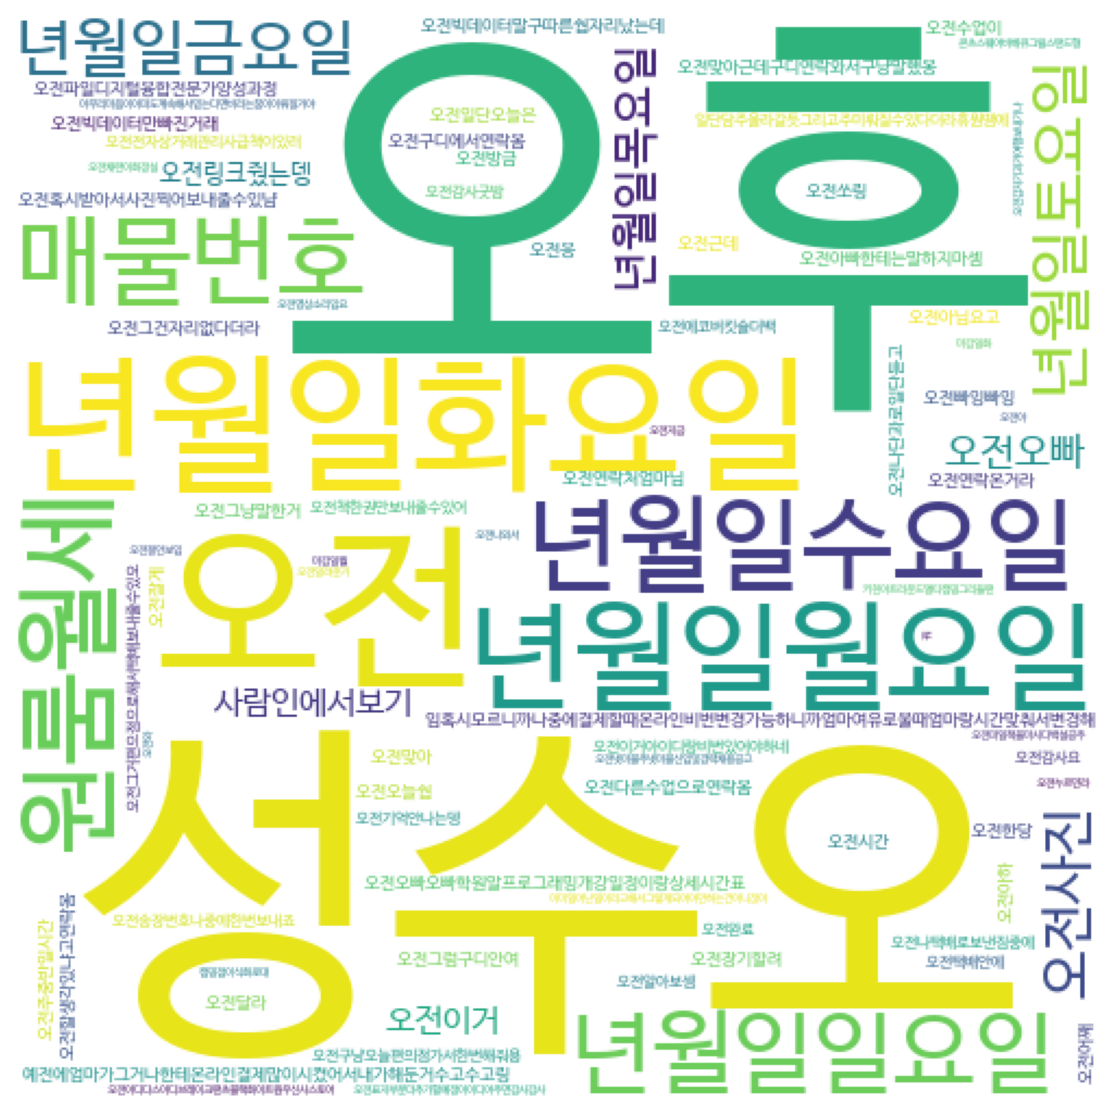

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()